Import libraries to work with

In [1]:
# Basic imports
import matplotlib.pyplot as plt
import pandas as pd

# Specific Imports
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter

Import the data

In [2]:
# Initialize dataset from file
dataset = pd.read_csv('combinedData.csv')

# Verify the import worked
print(dataset.head())

# Verify the update
print(dataset.shape)

   January 2008  February 2008  March 2008  April 2008  May 2008  June 2008  \
0         86.10          86.30        86.4        86.3     86.20       86.3   
1          6.81           6.72         6.6         6.4      6.21        6.2   
2        119.20         119.60       120.1       121.2    121.60      122.3   

   July 2008  August 2008  September 2008  October 2008  ...  March 2023  \
0      86.30        86.30           86.30         85.60  ...      128.40   
1       6.37         6.25            6.16          6.46  ...        5.81   
2     123.30       123.80          123.10        123.20  ...      168.90   

   April 2023  May 2023  June 2023  July 2023  August 2023  September 2023  \
0      128.20    128.30     128.30     128.20       128.10          127.80   
1        5.75      5.74       5.85       5.99         6.17            6.27   
2      169.90    170.60     171.40     172.60       174.00          174.80   

   October 2023  November 2023  December 2023  
0        127.60  

Break the data up into usable sets

In [3]:
# Setup the House cost variable
house_cost = dataset.iloc[0]

# Setup the Interest Rate variable
interst_rate = dataset.iloc[1]

# Setup Canada Price Index for shelter variable
cpi = dataset.iloc[2]

# Check the new variables
print(
    f"House Cost: \n{house_cost[0:4]}\n"
    f"Interest Rate: \n{interst_rate[0:4]}\n"
    f"CPI: \n{cpi[0:4]}\n"
    )

House Cost: 
January 2008     86.1
February 2008    86.3
March 2008       86.4
April 2008       86.3
Name: 0, dtype: float64
Interest Rate: 
January 2008     6.81
February 2008    6.72
March 2008       6.60
April 2008       6.40
Name: 1, dtype: float64
CPI: 
January 2008     119.2
February 2008    119.6
March 2008       120.1
April 2008       121.2
Name: 2, dtype: float64



Append variables to dictionary for iterability

In [4]:
# Initialize new list for variable data
data_vars = [house_cost, interst_rate, cpi]

# Setup a list of the titles of the data sets
titles = ['House Cost', 'Interest Rate', 'CPI']
info = ['201612=100', 'Percent', '2002=100']

# Couple the titles and info with the data sets
data_list = list(zip(
    titles,
    info,
    [data_vars[item] for item in range(len(titles))]
    ))

# Verify the coupling worked
print(data_list)

[('House Cost', '201612=100', January 2008       86.1
February 2008      86.3
March 2008         86.4
April 2008         86.3
May 2008           86.2
                  ...  
August 2023       128.1
September 2023    127.8
October 2023      127.6
November 2023     127.2
December 2023     127.2
Name: 0, Length: 192, dtype: float64), ('Interest Rate', 'Percent', January 2008      6.81
February 2008     6.72
March 2008        6.60
April 2008        6.40
May 2008          6.21
                  ... 
August 2023       6.17
September 2023    6.27
October 2023      6.42
November 2023     6.47
December 2023     6.39
Name: 1, Length: 192, dtype: float64), ('CPI', '2002=100', January 2008      119.2
February 2008     119.6
March 2008        120.1
April 2008        121.2
May 2008          121.6
                  ...  
August 2023       174.0
September 2023    174.8
October 2023      176.3
November 2023     177.1
December 2023     177.8
Name: 2, Length: 192, dtype: float64)]


Start plotting some Graphs to identify trends

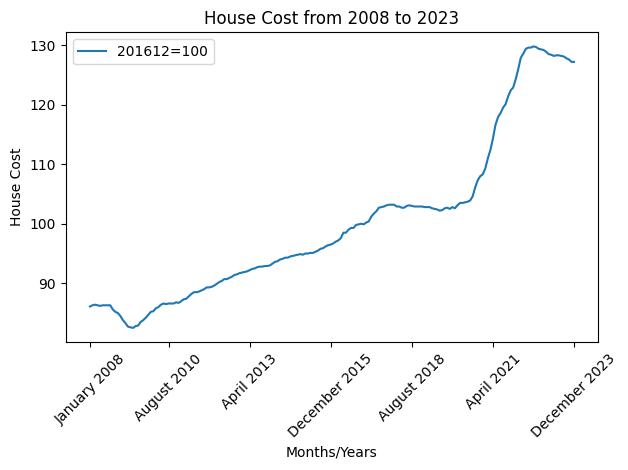

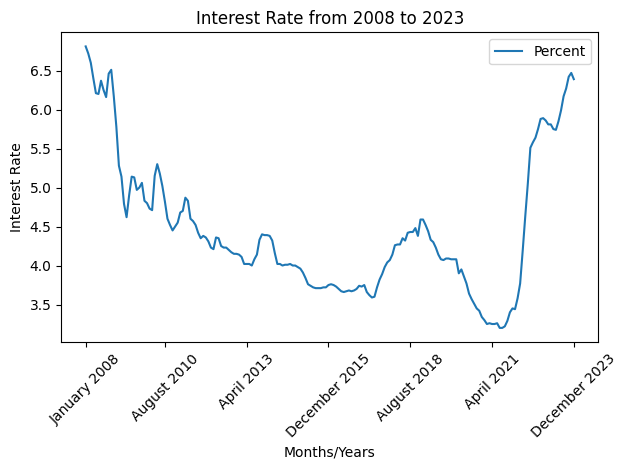

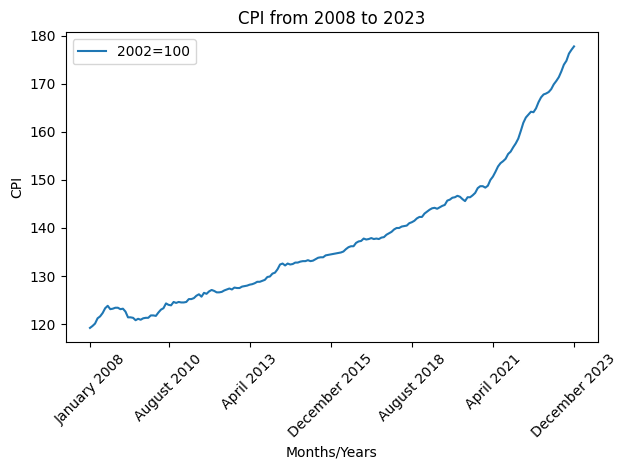

In [5]:
# Start a for loop to make graphs for all the sets in the dictonary
for title, info, data in data_list:
  # Make a new Figure
  fig = plt.figure()

  # Add a plot to the figure
  plot = fig.add_subplot(1, 1, 1)

  # plot the data to the graph
  data_ticks = data.index.tolist()
  plot.plot(data_ticks, data)

  # Add Dynamic Labels and Legend
  plot.set_title(f'{title} from 2008 to 2023')
  plot.legend([f'{info}'])

  # X Labels and ticks
  # Space out the X ticks for readability
  spaced_ticks = [
      data_ticks[0],
      data_ticks[31],
      data_ticks[63],
      data_ticks[95],
      data_ticks[127],
      data_ticks[159],
      data_ticks[191]
      ]

  plot.set_xticks(spaced_ticks)
  plot.set_xticklabels(spaced_ticks, rotation=45)
  plot.set_xlabel('Months/Years')

  # y Labels
  plot.set_ylabel(f'{title}')

  # Adjust layout for better appearance
  fig.tight_layout()

  # Save the plot to a dynamic SVG file
  plt.savefig(f'{title}.svg', format='svg', bbox_inches='tight')

  # Display plot to user
  plt.show()